In [62]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyzahn2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyzahn2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
def get_titles(file):
    arr = [x[0:-1] for x in file]
    return arr

def get_summaries(file):
    arr = []
    empty = " "
    symbols = ["'s", "'", '"', "\\", "/"]
    for line in file:
        arr.append([])
        temp = line[1:-1]
        temp = temp.split("::")[0:-1]
        for i in range(1, len(temp)):
            temp[i] = temp[i].split(",")[1:]
            temp[i] = empty.join(temp[i])
        temp = empty.join(temp)
        for symbol in symbols:
            temp = temp.replace(symbol, " ")
        arr[-1] = temp
    return arr
titles1 = open("cs410project-master/movie_titles_top_250.txt")
titles2 = open("cs410project-master/movie_titles_bottom_250.txt")
summaries1 = open("cs410project-master/movie_summaries_top_250.txt")
summaries2 = open("cs410project-master/movie_summaries_bottom_250.txt")
sum1 = get_summaries(summaries1)
sum2 = get_summaries(summaries2)
tit1 = get_titles(titles1)
tit2 = get_titles(titles2)
titles = tit1 + tit2
print(titles)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather: Part II', 'Pulp Fiction', 'The Lord of the Rings: The Return of the King', "Schindler's List", 'The Good, the Bad and the Ugly', '12 Angry Men', 'The Lord of the Rings: The Fellowship of the Ring', 'Inception', 'Forrest Gump', 'Fight Club', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', 'The Lord of the Rings: The Two Towers', "One Flew Over the Cuckoo's Nest", 'Seven Samurai', 'Interstellar', 'Se7en', 'LÃ©on: The Professional', 'The Silence of the Lambs', 'Star Wars: Episode IV - A New Hope', 'Saving Private Ryan', 'Spirited Away', 'The Usual Suspects', 'Life Is Beautiful', 'City of God', "It's a Wonderful Life", 'City Lights', 'Coco', 'The Lion King', 'Back to the Future', 'The Green Mile', 'Gladiator', 'The Departed', 'Whiplash', 'Raiders of the Lost Ark', 'Alien', 'The Prestige', 'Apocalypse Now', 'Psycho', 'Terminator 2', 'American History X', 'Memento', 'Sunset Boulevar

In [66]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

def token_stem_all(arr1, arr2):
    arr = []
    stems = []
    tokens = []
    space = " "
    for movie in arr1:
        temp = tokenize_and_stem(movie)
        stems.extend(temp)
        arr.append(temp)
        temp = tokenize_only(movie)
        tokens.extend(temp)
    for movie in arr2:
        temp = tokenize_and_stem(movie)
        stems.extend(temp)
        arr.append(temp)
        temp = tokenize_only(movie)
        tokens.extend(temp)
    return arr, stems, tokens

stop_words = set(stopwords.words('english'))
#print(stop_words)
stemmer = SnowballStemmer("english")
sumt, stems, tokens = token_stem_all(sum1, sum2)
vocab_frame = pd.DataFrame({'words': tokens}, index = stems)
print('There are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
print(sumt)

There are 145422 items in vocab_frame
[['chronicl', 'the', 'experi', 'of', 'a', 'former', 'success', 'banker', 'as', 'a', 'prison', 'in', 'the', 'gloomi', 'jailhous', 'of', 'shawshank', 'after', 'be', 'found', 'guilti', 'of', 'a', 'crime', 'he', 'did', 'not', 'commit', 'the', 'film', 'portray', 'the', 'man', 'uniqu', 'way', 'of', 'deal', 'with', 'his', 'new', 'tortur', 'life', 'along', 'the', 'way', 'he', 'befriend', 'a', 'number', 'of', 'fellow', 'prison', 'most', 'notabl', 'a', 'wise', 'long-term', 'inmat', 'name', 'red', 'stori', 'of', 'a', 'hot-shot', 'american', 'banker', 'andrew', 'dufresn', 'who', 'find', 'himself', 'to', 'be', 'an', 'inmat', 'at', 'the', 'shawshank', 'prison', 'for', 'a', 'crime', 'he', 'say', 'he', 'didn', 't', 'commit', 'the', 'murder', 'of', 'his', 'wife', 'and', 'her', 'lover', 'the', 'movi', 'revolv', 'around', 'andi', 'take', 'on', 'this', 'drastic', 'transform', 'his', 'journey', 'as', 'an', 'inmat', 'in', 'the', 'prison', 'dure', 'which', 'he', 'befrien

In [67]:
print(vocab_frame.head())
space = " "
sum_all = []
sum_top = []
sum_bot = []
for i in range(250):
    temp = space.join(sumt[i])
    sum_all.append(temp)
    sum_top.append(temp)
for i in range(250, 499):
    temp = space.join(sumt[i])
    sum_all.append(temp)
    sum_bot.append(temp)
print(sum_all)

                words
chronicl   chronicles
the               the
experi    experiences
of                 of
a                   a
['chronicl the experi of a former success banker as a prison in the gloomi jailhous of shawshank after be found guilti of a crime he did not commit the film portray the man uniqu way of deal with his new tortur life along the way he befriend a number of fellow prison most notabl a wise long-term inmat name red stori of a hot-shot american banker andrew dufresn who find himself to be an inmat at the shawshank prison for a crime he say he didn t commit the murder of his wife and her lover the movi revolv around andi take on this drastic transform his journey as an inmat in the prison dure which he befriend red a fellow inmat as well as gain the respect of his friend after the murder of his wife hotshot banker andrew dufresn is sent to shawshank prison where the usual unpleas occur over the year he retain hope and eventu gain the respect of his fellow inmat e

In [68]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(sum_all) #fit the vectorizer to synopses
print(tfidf_matrix.shape)
tfidf_vectorizer_top = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix_top = tfidf_vectorizer_top.fit_transform(sum_top)
print(tfidf_matrix_top.shape)
tfidf_vectorizer_bot = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix_bot = tfidf_vectorizer_bot.fit_transform(sum_bot)
print(tfidf_matrix_bot.shape)

(499, 139)
(250, 274)
(249, 32)


In [69]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)
terms_top = tfidf_vectorizer_top.get_feature_names()
print(terms_top)
terms_bot = tfidf_vectorizer_bot.get_feature_names()
print(terms_bot)
dist = 1 - cosine_similarity(tfidf_matrix)
dist1 = 1 - cosine_similarity(tfidf_matrix_top)
dist2 = 1 - cosine_similarity(tfidf_matrix_bot)

['american', 'ani', 'anoth', 'attempt', 'away', 'battl', 'becaus', 'becom', 'befor', 'begin', 'believ', 'best', 'boy', 'brazil', 'bring', 'chang', 'citi', 'come', 'crime', 'danger', 'daughter', 'day', 'dead', 'death', 'decid', 'discov', 'doe', 'doesn', 'doesn t', 'dure', 'end', 'escap', 'eventu', 'evil', 'face', 'fall', 'famili', 'father', 'feel', 'fight', 'film', 'final', 'follow', 'forc', 'friend', 'girl', 'goe', 'good', 'great', 'group', 'happen', 'head', 'help', 'high', 'home', 'hope', 'howev', 'includ', 'janeiro', 'janeiro brazil', 'job', 'join', 'just', 'kill', 'know', 'known', 'later', 'lead', 'learn', 'leav', 'life', 'like', 'littl', 'live', 'local', 'long', 'look', 'love', 'make', 'man', 'manag', 'mani', 'meet', 'men', 'mother', 'murder', 'mysteri', 'need', 'new', 'night', 'offic', 'old', 'onc', 'order', 'peopl', 'person', 'place', 'plan', 'polic', 'power', 'realiz', 'return', 'rio', 'rio janeiro', 'rio janeiro brazil', 'run', 'save', 'secret', 'seek', 'set', 'sever', 'small',

In [138]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

ranks = ([1] * 250) + ([0] * 249)

def rank_graph():
    MDS()
    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    
    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
    
    xs, ys = pos[:, 0], pos[:, 1]
    print()
    print()
    
    #set up colors per clusters using a dict
    cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
    #set up cluster names using a dict
    cluster_names = {0: 'Top',
                 1: 'Bottom',
                 2: '3', 
                 3: '4', 
                 4: '5'}
    #some ipython magic to show the matplotlib plots inline
    %matplotlib inline 
    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, title=titles, rank=ranks))
    #group by cluster
    groups = df.groupby('rank')
    # set up plot
    fig, ax = plt.subplots(figsize=(17, 9)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label=cluster_names[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')
    
    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  
    plt.show() #show the plot
    #uncomment the below to save the plot if need be
    #plt.savefig('clusters_small_noaxes.png', dpi=200)

def clust(num_clusters, tfidf_matrix, dist, titles, ranks, sum_all):
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()
    films = { 'title': titles, 'rank': ranks, 'synopsis': sum_all,'cluster': clusters}
    frame = pd.DataFrame(films, index = [clusters] , columns = ['title', 'rank', 'cluster'])
    print(frame['cluster'].value_counts())
    print("\n")
    grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes
    print(grouped.mean())
    
    print("Top terms per cluster:")
    print()
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
    
    for i in range(num_clusters):
        print("Cluster %d words:" % i, end='')
        
        for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
            try:
                print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
            except:
                pass
        print() #add whitespace
        print() #add whitespace
        
#       print("Cluster %d titles:" % i, end='')
#       for title in frame.loc[i]['title'].values.tolist():
#           print(' %s,' % title, end='')
#       print() #add whitespace
#       print() #add whitespace
     
    MDS()
    # convert two components as we're plotting points in a two-dimensional plane
    # "precomputed" because we provide a distance matrix
    # we will also specify `random_state` so the plot is reproducible.
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    
    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
    
    xs, ys = pos[:, 0], pos[:, 1]
    print()
    print()
    
    #set up colors per clusters using a dict
    cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
    #set up cluster names using a dict
    cluster_names = {0: '1', 
                 1: '2', 
                 2: '3', 
                 3: '4', 
                 4: '5'}
    #some ipython magic to show the matplotlib plots inline
    %matplotlib inline 
    #create data frame that has the result of the MDS plus the cluster numbers and titles
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles, rank=ranks))
    #group by cluster
    groups = df.groupby('label')
    # set up plot
    fig, ax = plt.subplots(figsize=(17, 9)) # set size
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    #iterate through groups to layer the plot
    #note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label=cluster_names[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')
    
    ax.legend(numpoints=1)  #show legend with only 1 point

    #add label in x,y position with the label as the film title
    for i in range(len(df)):
        ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  
    plt.show() #show the plot
    #uncomment the below to save the plot if need be
    #plt.savefig('clusters_small_noaxes.png', dpi=200)

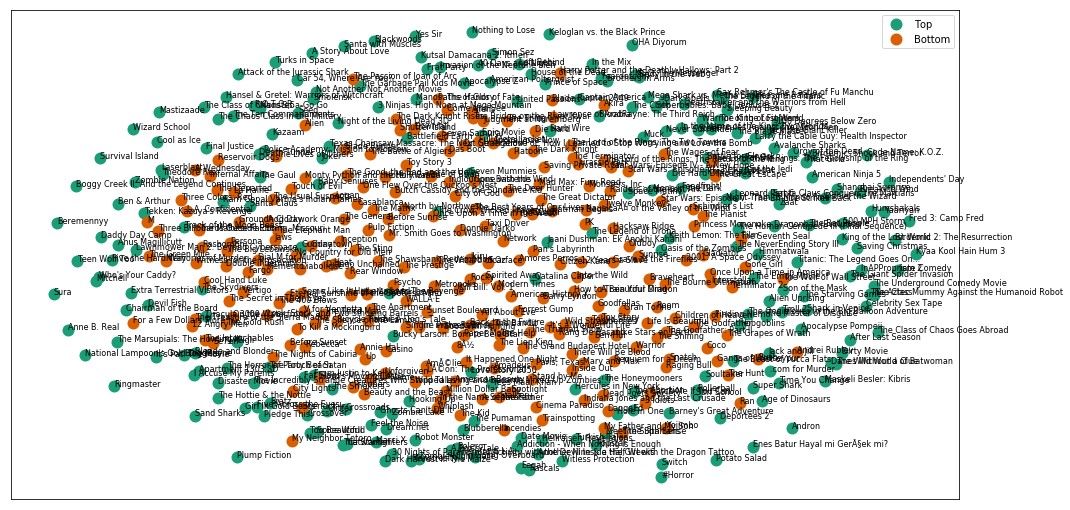

In [121]:
rank_graph()
#graph cosine similarities showing separation of top 250 movies and bottom 249

0    268
1    231
Name: cluster, dtype: int64


cluster
0    0.317164
1    0.714286
Name: rank, dtype: float64
Top terms per cluster:

Cluster 0 words: b'kills', b'evil', b'murder', b'world', b'war', b'powerful',

Cluster 1 words: b'life', b'friends', b'live', b'love', b'new', b'father',





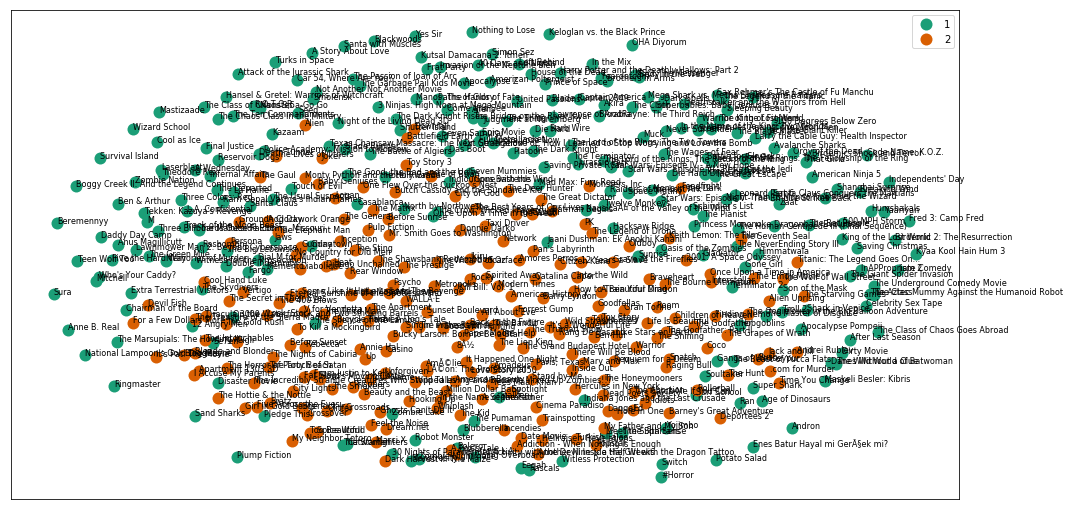

In [136]:
#clustering on all movies together
#change the first number to change the number of clusters
clust(2, tfidf_matrix, dist, titles, ranks, sum_all)

1    145
0    105
Name: cluster, dtype: int64


cluster
0    1
1    1
Name: rank, dtype: int64
Top terms per cluster:

Cluster 0 words: b'working',

Cluster 1 words: b'night', b'powerful', b'old',





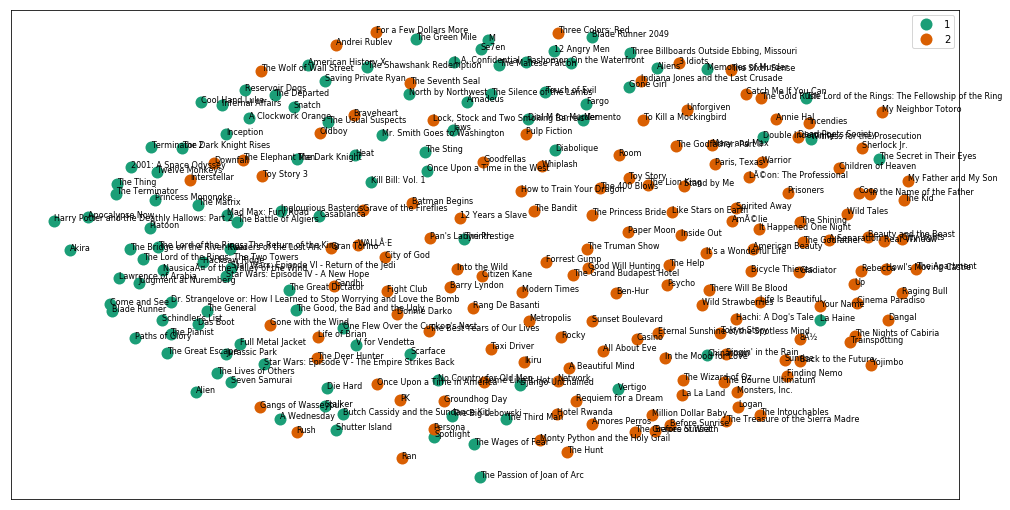

In [139]:
#clustering on top 250 movies only
#change the first number to change the number of clusters
clust(2, tfidf_matrix_top, dist1, titles[0:250], ranks[0:250], sum_top)

0    173
1     76
Name: cluster, dtype: int64


cluster
0    0
1    0
Name: rank, dtype: int64
Top terms per cluster:

Cluster 0 words: b'becomes', b'decides', b'before', b'american', b'brazil', b'changing',

Cluster 1 words: b'away', b'during', b'boy', b'daughter', b'deaths', b'does',





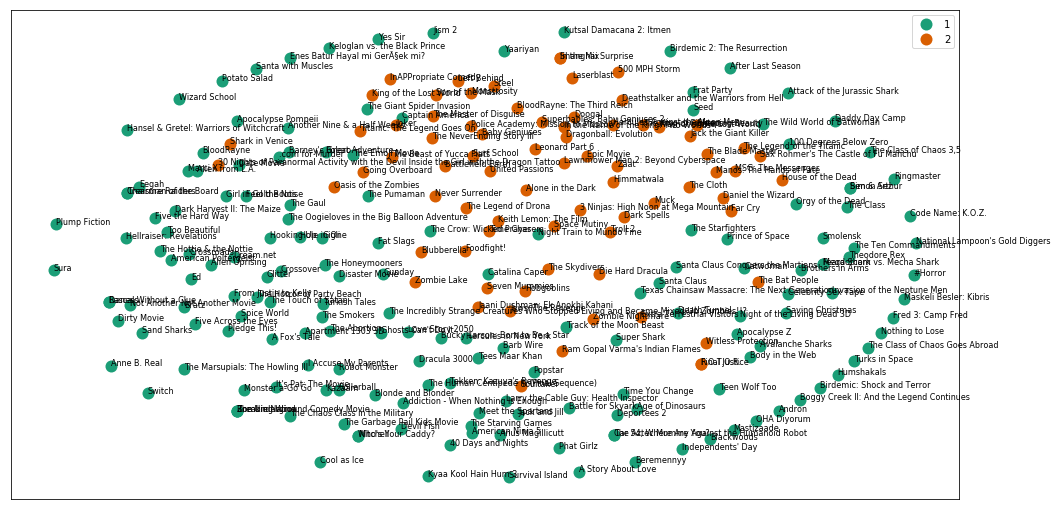

In [143]:
#clustering on bottom 249 movies only
#change the first number to change the number of clusters
clust(2, tfidf_matrix_bot, dist2, titles[250:], ranks[250:], sum_bot)